## Сравнение метода Пиявского и генетического алгорима для поиска минимума

In [2]:
from matplotlib import pyplot as plt
import random
import math
import numpy as np
from operator import itemgetter
%matplotlib inline

In [4]:
def pijavskij(f, L, a, b, eps=1e-5):
    xa, ya, xb, yb = a, f(a), b, f(b)
    x = (yb - ya - L * (xb + xa))/(-2 * L)
    y = ya - L*(x - xa)
    pjvsk = [[(xa, ya), (x, y), (xb, yb)]]
    last = (x,f(x))
    index = 1
    steps = 0
    while True:
        steps += 1
        r = pjvsk[-1].copy()
        r[index] = last
        (xa, ya), (xb, yb) = r[index-1], r[index]
        x1 = (yb - ya - L * (xb + xa))/(-2 * L)
        y1 = ya - L*(x1 - xa)
        (xa, ya), (xb, yb) = r[index], r[index+1]
        x2 = (yb - ya - L * (xb + xa))/(-2 * L)
        y2 = ya - L*(x2 - xa)
        r.append([x1, y1]) 
        r.append([x2, y2])
        r.sort(key=itemgetter(0))    
        pjvsk.append(r.copy())
        xx = sorted(r, key=itemgetter(1))[0][0]
        for i,(xxx, _) in enumerate(r):
            if xxx == xx:
                index = i
                break
        next = f(xxx)
        if np.isclose(next,last[1],eps):
            print("#steps:", steps)
            return (xx, next)
        last = (xx,next)

In [5]:
def genetic(f, a, b, eps=1e-10):
    POPULATION = 16
    DIGITS_AFTER_POINT = 6
    TOP = 12
    
    genes = np.array([random.random()*(b-a)+a for p in range(POPULATION)])*10**DIGITS_AFTER_POINT
    genes = np.ceil(genes)
    
    def crossover(x, y, p=0.6):
        return ''.join(xg if random.random() < p else yg for xg,yg in zip(x,y))
    
    @np.vectorize
    def mutate(x, p=0.01):
        return int(''.join(xg if random.random() > p else {'0':'1', '1':'0'}[xg] for xg in list(x)), 2)
    
    
    scores = f(genes/10**DIGITS_AFTER_POINT)
    
    gens_scores_zip = list(zip(genes, scores))
    gens_scores_zip.sort(key = lambda x:x[1]) 
    gens_scores_zip = np.array(gens_scores_zip) 
    
    best_gen, best_score = gens_scores_zip[0]
    
    n = 0
    k = 0
    
    while True:
        n += 1
        genes_to_crossover = [bin(int(g))[2:] for g in gens_scores_zip[:TOP, 0]]
        new_genes = np.array([crossover(g1, g2) for g1, g2 in zip(genes_to_crossover[::2], genes_to_crossover[1::2])])
        genes = mutate(np.append(genes_to_crossover, new_genes))
        scores = f(genes/10**DIGITS_AFTER_POINT)
        gens_scores_zip = list(zip(genes, scores))
        gens_scores_zip.sort(key = lambda x:x[1]) 
        gens_scores_zip = np.array(gens_scores_zip) 
        if np.isclose(gens_scores_zip[0,1], best_score, eps):
            k += 1
            if k > 50:
                return gens_scores_zip[0,0]/10**DIGITS_AFTER_POINT, gens_scores_zip[0, 1], n
        if n > 1000:
            return gens_scores_zip[0,0]/10**DIGITS_AFTER_POINT, gens_scores_zip[0, 1], n
        else: best_gen, best_score = gens_scores_zip[0]
        

In [6]:
f = lambda x: np.sin(x)*1/x
A = 0.1
B = 15
eps = 1e-5

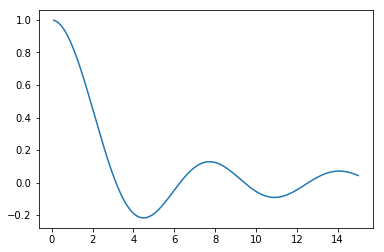

In [7]:
x = np.linspace(A, B, 10000)
plt.plot(x, f(x))
plt.show();

In [8]:
%%timeit -n 10
print(genetic(f, A, B, eps))

(4.4564469999999998, -0.21708442985629109, 58)
(4.456442, -0.21708438938139527, 62)
(4.4934130000000003, -0.21723362820985889, 53)
(4.4564149999999998, -0.21708417072160757, 60)
(4.1943020000000004, -0.20713056250929607, 64)
(4.4892149999999997, -0.21723171607627051, 56)
(4.4564469999999998, -0.21708442985629109, 60)
(4.1943029999999997, -0.20713063119486252, 65)
(4.4564469999999998, -0.21708442985629109, 57)
(4.4563810000000004, -0.21708389514335835, 57)
(4.7185920000000001, -0.21192354866356616, 61)
(4.4933110000000003, -0.21723362715827924, 53)
(4.4934399999999997, -0.21723362810990224, 54)
(4.493309, -0.21723362711506708, 53)
(4.1922550000000003, -0.20698946025392928, 57)
(4.4564469999999998, -0.21708442985629109, 53)
(4.4564469999999998, -0.21708442985629109, 61)
(4.1942700000000004, -0.20712836444450969, 62)
(4.4564469999999998, -0.21708442985629109, 61)
(4.5219839999999998, -0.2171453217089227, 60)
(4.4892149999999997, -0.21723171607627051, 64)
(4.4564469999999998, -0.2170844298

In [9]:
%%timeit -n 10
print(pijavskij(f, 1, A, B, eps))

#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 122
(4.4971193690170237, -0.21723213409405515)
#steps: 12